In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import numpy as np
import os
from PIL import Image
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -oq "/content/drive/MyDrive/ConstructionSiteSafety_yolov8.zip"

# **Visualization**

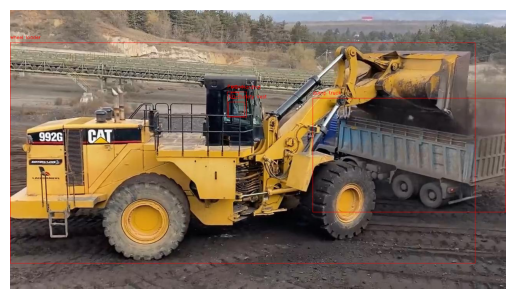

In [5]:
image_folder = "/content/train/images/"
label_folder = "/content/train/labels/"
data_yaml_path = "/content/data.yaml"

# Load class names from data.yml
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)
class_names = data['names']

# Get list of images
image_files = [f for f in os.listdir(image_folder)]

# Choose the first image
image_file = image_files[0]
image_path = os.path.join(image_folder, image_file)

# Get corresponding label file
label_path = os.path.join(label_folder, image_file.replace('.jpg', '.txt'))

# Load image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
h, w, _ = img.shape

# Read YOLO annotations
if os.path.exists(label_path):
    with open(label_path, "r") as file:
        labels = file.readlines()

    for label in labels:
        data = label.strip().split()
        class_id = int(float(data[0]))  # First value is class ID
        class_name = class_names[class_id]  # Get class name from YAML

        x_center, y_center, box_width, box_height = map(float, data[1:])

        # Convert YOLO format to pixel values
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Draw bounding box with class name
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
        cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

# Display image with bounding boxes
plt.imshow(img)
plt.axis("off")
plt.show()

# **Data Augmentation**

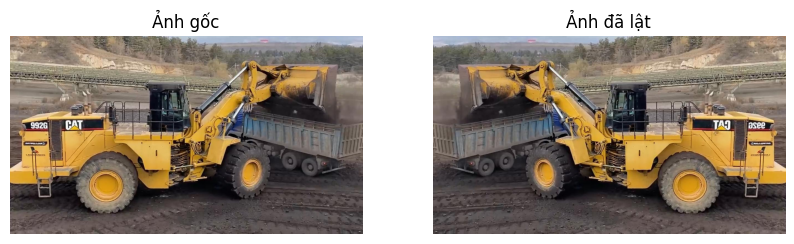

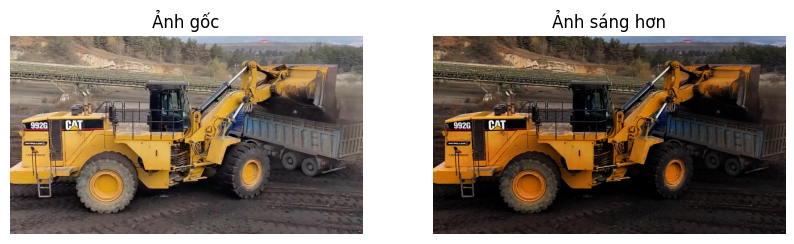

In [6]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
flipped_img = cv2.flip(img, 1)

gamma = 0.5
table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
brighter_img = cv2.LUT(img, table)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Ảnh gốc")
ax[0].axis("off")

ax[1].imshow(flipped_img)
ax[1].set_title("Ảnh đã lật")
ax[1].axis("off")

plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Ảnh gốc")
ax[0].axis("off")

ax[1].imshow(brighter_img)
ax[1].set_title("Ảnh sáng hơn")
ax[1].axis("off")

plt.show()

In [7]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    flipped_img = cv2.flip(img, 1)
    flipped_path = os.path.join(image_folder, "flipped_" + image_file)
    cv2.imwrite(flipped_path, flipped_img)

    gamma = 0.5
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    brighter_img = cv2.LUT(img, table)
    brighter_path = os.path.join(image_folder, "brighter_" + image_file)
    cv2.imwrite(brighter_path, brighter_img)

In [8]:
for text_file in os.listdir(label_folder):

    text_path = os.path.join(label_folder, text_file)
    with open(text_path, "r") as file:
        lines = file.readlines()

    flipped_lines = []
    for line in lines:
        data = line.strip().split()
        class_id ,x_center, y_center, box_width, box_height = map(float, data)

        new_x_center = 1 - x_center

        flipped_lines.append(f"{class_id} {new_x_center} {y_center} {box_width} {box_height}\n")

    brighter_label_path = os.path.join(label_folder, "brighter_" + text_file)
    with open(brighter_label_path, "w") as file:
        file.writelines(lines)
    file.close()

    flipped_label_path = os.path.join(label_folder, "flipped_" + text_file)
    with open(flipped_label_path, "w") as file:
        file.writelines(flipped_lines)
    file.close()


# **Train model**

In [9]:
model = YOLO("yolov8n.pt")  # build a new model from scratch

# Use the model
results = model.train(data=data_yaml_path,  batch=8, epochs=32)  # train the model

100%|██████████| 6.25M/6.25M [00:00<00:00, 101MB/s]


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=32, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.6MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1563 images, 102 backgrounds, 0 corrupt: 100%|██████████| 1563/1563 [00:00<00:00, 2224.76it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1479.29it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32      1.49G       1.38       3.72      1.428         23        640: 100%|██████████| 196/196 [00:41<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]

                   all        114        733      0.792      0.164      0.196      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/32      1.95G      1.378      2.435       1.41         60        640: 100%|██████████| 196/196 [00:41<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.53it/s]


                   all        114        733      0.496       0.33      0.312      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/32      1.56G      1.317      1.973      1.345         83        640: 100%|██████████| 196/196 [00:39<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]

                   all        114        733      0.672      0.281       0.33       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/32      1.81G      1.258      1.818      1.328         18        640: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]


                   all        114        733      0.717      0.315      0.377      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/32       1.6G      1.235      1.695      1.296        103        640: 100%|██████████| 196/196 [00:37<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        114        733      0.659      0.381      0.398      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/32      1.92G      1.204      1.631      1.272         73        640: 100%|██████████| 196/196 [00:40<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]

                   all        114        733       0.69      0.362      0.429      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/32      1.75G      1.183      1.539      1.258         21        640: 100%|██████████| 196/196 [00:38<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        114        733      0.426      0.481      0.452      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/32      1.65G      1.151      1.454      1.242         26        640: 100%|██████████| 196/196 [00:38<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.80it/s]

                   all        114        733      0.543       0.46      0.469       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/32      1.74G      1.126      1.381      1.213         26        640: 100%|██████████| 196/196 [00:38<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]


                   all        114        733      0.663      0.436      0.489      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/32      1.83G      1.115      1.349      1.215         72        640: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.23it/s]


                   all        114        733      0.661      0.418      0.483      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/32      1.85G      1.098      1.287      1.195         19        640: 100%|██████████| 196/196 [00:38<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.59it/s]

                   all        114        733      0.547      0.476      0.491      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/32      1.83G      1.081      1.249      1.179         34        640: 100%|██████████| 196/196 [00:37<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s]

                   all        114        733      0.692      0.436      0.496      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/32      1.78G      1.074      1.232      1.177         86        640: 100%|██████████| 196/196 [00:39<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]


                   all        114        733      0.722      0.476      0.522      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/32      1.49G      1.047      1.167      1.161         71        640: 100%|██████████| 196/196 [00:36<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.42it/s]


                   all        114        733      0.697      0.476      0.517      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/32      1.72G      1.028      1.168      1.158         81        640: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        114        733      0.787      0.472      0.539      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/32      1.65G      1.021      1.126      1.153         76        640: 100%|██████████| 196/196 [00:38<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        114        733      0.645      0.483      0.555      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/32      1.79G     0.9975      1.107      1.135         29        640: 100%|██████████| 196/196 [00:40<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        114        733      0.655      0.493      0.525       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/32       1.8G     0.9784      1.069      1.126         59        640: 100%|██████████| 196/196 [00:38<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        114        733      0.678      0.496      0.555      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/32       1.7G     0.9761      1.038       1.12         45        640: 100%|██████████| 196/196 [00:38<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        114        733      0.739      0.473      0.561      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/32      1.74G     0.9535      1.026      1.108         29        640: 100%|██████████| 196/196 [00:43<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]


                   all        114        733       0.71       0.49       0.54      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/32      1.81G     0.9459      1.014        1.1         67        640: 100%|██████████| 196/196 [00:44<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.00it/s]

                   all        114        733      0.807      0.454      0.549      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/32      1.65G     0.9407       1.01      1.105         23        640: 100%|██████████| 196/196 [00:41<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]

                   all        114        733      0.785      0.453      0.549      0.375


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/32      1.47G     0.9475      1.084      1.094         11        640: 100%|██████████| 196/196 [00:39<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.51it/s]

                   all        114        733      0.639      0.482      0.527       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/32      1.57G     0.8935     0.9717      1.058         18        640: 100%|██████████| 196/196 [00:42<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        114        733      0.738      0.495      0.546      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/32      1.58G     0.8864     0.9461      1.054         13        640: 100%|██████████| 196/196 [00:42<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        114        733      0.814      0.442      0.569      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/32      1.41G     0.8762     0.9286      1.044        121        640: 100%|██████████| 196/196 [00:37<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        114        733      0.823      0.465      0.591      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/32      1.57G     0.8563     0.8939      1.032         24        640: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        114        733      0.829      0.471      0.576      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/32      1.47G     0.8491     0.8897      1.033         15        640: 100%|██████████| 196/196 [00:39<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.45it/s]

                   all        114        733       0.78      0.494      0.583       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/32       1.5G     0.8381     0.8673      1.015         25        640: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        114        733      0.792      0.457      0.581      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/32       1.6G     0.8387     0.8641      1.029         16        640: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]


                   all        114        733      0.812      0.481      0.572      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/32      1.58G     0.8283     0.8568      1.013         21        640: 100%|██████████| 196/196 [00:36<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.53it/s]

                   all        114        733      0.718      0.502      0.574      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/32      1.48G     0.8243     0.8455      1.012          9        640: 100%|██████████| 196/196 [00:39<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        114        733      0.804      0.486      0.587      0.398



32 epochs completed in 0.371 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]


                   all        114        733      0.823      0.465      0.591      0.399
             Excavator         10         12      0.843      0.667      0.748      0.588
                Gloves         11         25      0.644       0.28      0.279      0.139
               Hardhat         42         79      0.925      0.544      0.707      0.505
                Ladder          8         10      0.631        0.6      0.547      0.436
                  Mask         19         21      0.957      0.762      0.848       0.59
            NO-Hardhat         37         69      0.844      0.449      0.549      0.294
               NO-Mask         44         74      0.755      0.324      0.446      0.169
        NO-Safety Vest         56        106      0.914      0.434      0.601      0.353
                Person         84        166       0.91      0.606      0.735      0.528
           Safety Cone         13         44       0.97      0.725       0.84      0.419
           Safety Ves

# **Prediction**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
folder_path = "/content/test/images"

In [20]:
results = model.predict(source=folder_path, save_txt=True, save_conf=True, save=True, conf = 0.5, iou=0.6)


image 1/82 /content/test/images/-4405-_png_jpg.rf.937688313347dbcd3b24201dd7882906.jpg: 640x640 1 dump truck, 16.4ms
image 2/82 /content/test/images/000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg: 448x640 1 Hardhat, 2 NO-Masks, 2 Persons, 11.6ms
image 3/82 /content/test/images/002551_jpg.rf.b09484b130c1587abfa8365c3d774bf1.jpg: 448x640 1 Gloves, 2 Hardhats, 2 NO-Safety Vests, 2 Persons, 9.5ms
image 4/82 /content/test/images/003357_jpg.rf.9fb1f2cebc239b4276a81ce2cbf9e911.jpg: 480x640 1 Person, 1 Safety Cone, 9.5ms
image 5/82 /content/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg: 448x640 5 Hardhats, 3 NO-Safety Vests, 6 Persons, 2 Safety Vests, 12.9ms
image 6/82 /content/test/images/004763_jpg.rf.c8f1bd1cb7cf6037f7c90a6c213d6364.jpg: 384x640 3 Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 9.0ms
image 7/82 /content/test/images/006463_jpg.rf.f134bfc3f96f0e501a027414ffffcc82.jpg: 448x640 9 Hardhats, 1 Mask, 3 NO-Masks, 8 NO-Safety Vests, 9 Persons, 8.5ms
image 8

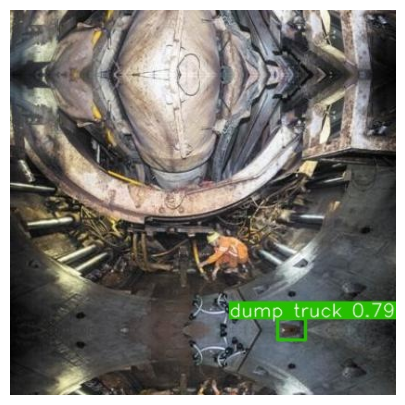

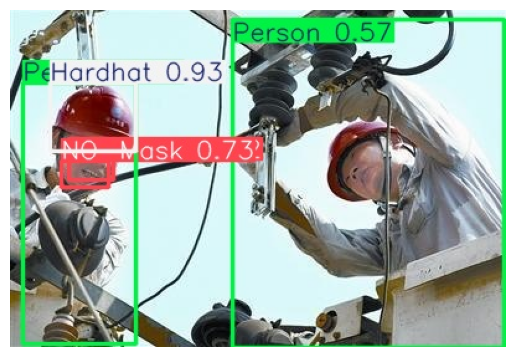

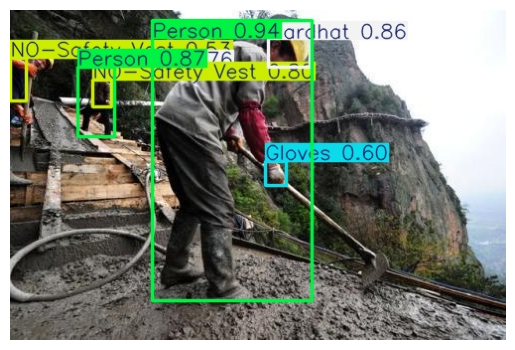

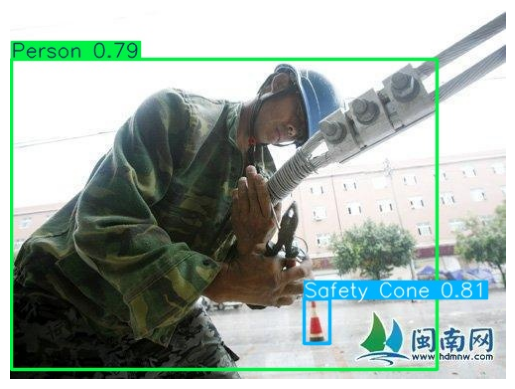

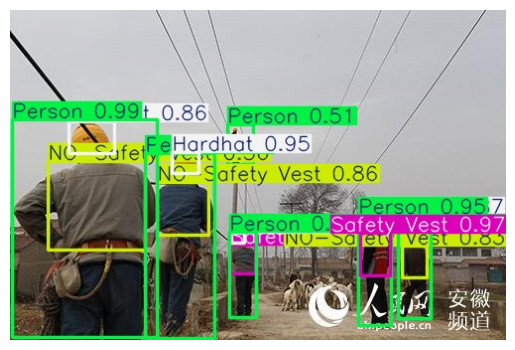

In [31]:
# Get list of image files
output_images_folder = "runs/detect/predict"
image_files = sorted([f for f in os.listdir(output_images_folder) if f.lower().endswith( '.jpg')])

plt.figure(figsize=(10, 5))

for i in range(5):
    img_path = os.path.join(output_images_folder, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    plt.imshow(img)
    plt.axis("off")

    plt.show()

In [36]:
def read_labels(file_path):
    with open(file_path, 'r') as file, file:
        lines = file.readlines()
    labels = [list(map(float, line.strip().split())) for line in lines]
    return labels

def iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    box1Area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2Area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    iou = interArea / float(box1Area + box2Area - interArea)

    return iou

def compare_labels(pred_folder, gt_folder):
    pred_files = sorted(os.listdir(pred_folder))
    gt_files = sorted(os.listdir(gt_folder))

    assert len(pred_files) == len(gt_files), "Mismatch in number of prediction and ground truth files."

    iou_scores = []
    overall_precision = []
    overall_recall = []

    for pred_file, gt_file in zip(pred_files, gt_files):
        pred_labels = read_labels(os.path.join(pred_folder, pred_file))
        gt_labels = read_labels(os.path.join(gt_folder, gt_file))

        file_iou_scores = []
        true_positive = 0
        false_positive = 0
        false_negative = 0

        for pred_label in pred_labels:
            pred_box = pred_label[1:5]  # Assuming format [class, x1, y1, x2, y2]
            match_found = False
            for gt_label in gt_labels:
                gt_box = gt_label[1:5]  # Assuming format [class, x1, y1, x2, y2]
                iou_score = iou(pred_box, gt_box)
                if iou_score >= 0.5:
                    file_iou_scores.append(iou_score)
                    match_found = True
                    true_positive += 1
                    break

            if not match_found:
                false_positive += 1

        false_negative = len(gt_labels) - true_positive
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0

        iou_scores.extend(file_iou_scores)
        overall_precision.append(precision)
        overall_recall.append(recall)

    print(f"IoU: {np.mean(iou_scores):.2f}")
    print(f"Precision: {np.mean(overall_precision):.2f}")
    print(f"Recall: {np.mean(overall_recall):.2f}")

pred_folder = "/content/runs/detect/predict/labels"
gt_folder = "/content/test/labels"
compare_labels(pred_folder, gt_folder)



IoU: 0.67
Precision: 0.58
Recall: 10.68
